###  1. Loading Libraries

In [1]:
# Pandas and Numpy for Data manipulation & Calculation
# Matplotlib for visualization 
import csv
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import statistics

### 2. Loading Data

In [2]:
df = pd.read_csv("D:/GIT PROJECTS/Final Olympic Project/olympics.csv")
print(df.shape)

(271116, 17)


In [3]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [4]:
df.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland,NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland,NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,NaN


### 2.1 Columns

In [5]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region', 'notes'],
      dtype='object')

In [6]:
df.describe() # description of data

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  region  270746 non-null  object 
 16  notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 35.2+ MB


### 2.2 Understanding Data

### 2.2.1 Checking for NULL Values

In [8]:
df.isna().sum() # getting the number of missing values in each column

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
notes     266077
dtype: int64

In [9]:
# columns that contain null values along with the count of null values present in each column
null_columns = df.columns[df.isnull().any()]
print(null_columns)
for column in null_columns:
    null_count = df[column].isnull().sum()
    print(f"{column} - {null_count}")


Index(['Age', 'Height', 'Weight', 'Medal', 'region', 'notes'], dtype='object')
Age - 9474
Height - 60171
Weight - 62875
Medal - 231333
region - 370
notes - 266077


### 2.2.2 Handling missing values

* We found out that Age, Height, Weight, Medal, region and notes columns contain null values.

* For the columns "Height, Weight and notes", we are going to drop these columns as they are not required in our further analysis.
* For the "region" column, remove all the rows where the region column is having null values.

In [10]:
df.drop(['Height', 'Weight', 'notes'],axis=1,inplace=True)
df.dropna(subset=['region'],inplace=True)
print(df.shape)

(270746, 14)


*  We are going to handle the Medal column. Let's replace these missing values with 'DNW'. DNW means Did not win.

In [11]:
df['Medal'].fillna('DNW',inplace=True)
print(df['Medal'].value_counts())



DNW       230972
Gold       13371
Bronze     13291
Silver     13112
Name: Medal, dtype: int64


*  We are going to handle the age column. let's replace these missing values with means of the age of the players belonging to that particular game.

In [12]:
mean_age_by_sport= df.groupby('Sport')['Age'].mean()
df['Age'] = df.groupby('Sport')['Age'].apply(lambda x: x.fillna(x.mean()))
mean_age = df['Age'].mean()
print(int(round(mean_age, 0)))

26


C:\Users\ANUBHAV GUPTA\AppData\Local\Temp\ipykernel_14004\2389956843.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df['Age'] = df.groupby('Sport')['Age'].apply(lambda x: x.fillna(x.mean()))


In [13]:
df.isnull().sum()

ID        0
Name      0
Sex       0
Age       0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
region    0
dtype: int64

In [14]:
df.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
region     object
dtype: object

### 3. Statistical Analysis of Olympics Dataset

*  Q1. What is the probability distribution “of the age” of all the players who
 participated in the swimming competition between the years 2000 - 2016.

In [22]:
import scipy.stats as stats
from scipy.stats import norm
import statistics
import matplotlib.pyplot as plt

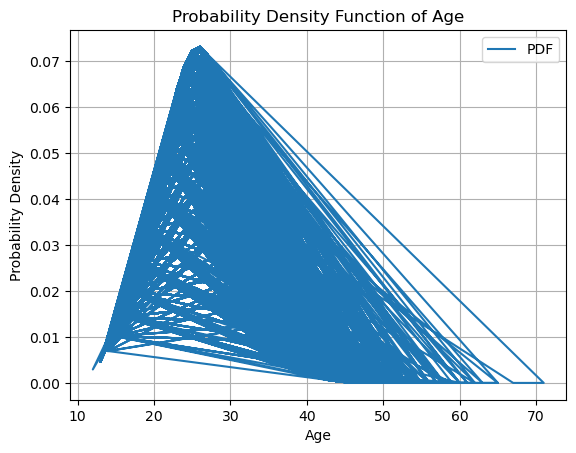

20 to 25


In [25]:
import scipy.stats as stats
from scipy.stats import norm
import statistics
import matplotlib.pyplot as plt
olympics = pd.read_csv("D:/GIT PROJECTS/Final Olympic Project/olympics.csv")
age_data = olympics.loc[(olympics['Year'] >= 2000) & (olympics['Year'] <= 2016), 'Age']

# Calculate mean and standard deviation using NumPy
mean_age = np.mean(age_data)
std_age = np.std(age_data)

# Generate probability density function (PDF) using scipy.stats.norm.pdf
pdf_values = stats.norm.pdf(age_data, loc=mean_age, scale=std_age)

# Plot the PDF
plt.plot(age_data, pdf_values, label='PDF')
plt.xlabel('Age')
plt.ylabel('Probability Density')
plt.title('Probability Density Function of Age')
plt.grid()
plt.legend()
plt.show()

print("20 to 25")

* Q2. Is the overall distribution of Gold Medals tally in India, positive or negative skewed


In [17]:
import statistics
import scipy.stats as stats

[ 7 14 15 19 20 14 17 15 16  1]
Int64Index([1924, 1928, 1932, 1936, 1948, 1952, 1956, 1964, 1980, 2008], dtype='int64')


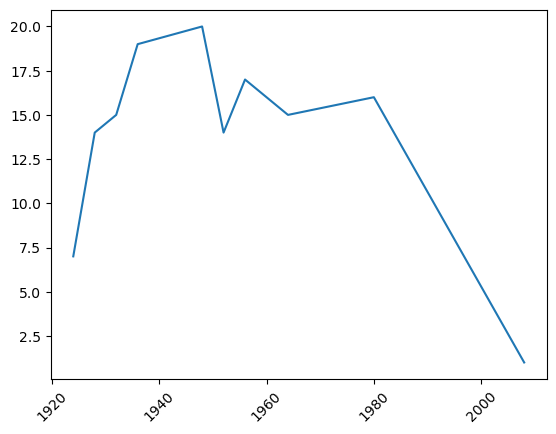

Left Skewed


In [18]:
olympics = pd.read_csv("D:/GIT PROJECTS/Final Olympic Project/olympics.csv")
medals_india = olympics[olympics['region'] == 'India']
gold_medals_india = medals_india[medals_india['Medal'] == 'Gold']

# Group and count the gold medals by year
gd = gold_medals_india['Year'].value_counts().sort_index().values
years = gold_medals_india['Year'].value_counts().sort_index().index
print(gd)
print(years)

skewness = stats.skew(gd, bias=False)

plt.plot(years, gd)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

if skewness > 0:
    print("Right Skewed")
else:
    print("Left Skewed")

* Q3.What is the standard deviation/error of the distribution of gold medals when the
 UK is hosting the Olympic games and when not hosting the games? (When games
 are hosted in the UK, the city is London.)

In [19]:
olympics = pd.read_csv("D:/GIT PROJECTS/Final Olympic Project/olympics.csv")
london_medals_host = olympics.loc[(olympics["City"] == "London") & (olympics["region"] == "UK") & (olympics["Medal"] == "Gold")] 
gold_count_host = london_medals_host.groupby("Year")["Medal"].value_counts() 
london_medals_non_host = olympics.loc[(olympics["City"] != "London") & (olympics["region"] == "UK") & (olympics["Medal"] == "Gold")] 
gold_count_non_host = london_medals_non_host.groupby("Year")["Medal"].value_counts() 
host_stdev = statistics.stdev(gold_count_host) 
non_host_stdev = statistics.stdev(gold_count_non_host) 
print(host_stdev) 
print(non_host_stdev)

71.97453253292676
18.14528124684469


* Q4. Standardise the age of all the participants participating in the Shooting
Competition and calculate this standardised data's mean and standard deviation.


In [21]:
olympics = pd.read_csv("D:/GIT PROJECTS/Final Olympic Project/olympics.csv")
shooting_age = pd.to_numeric(olympics[olympics["Sport"] == "Shooting"]["Age"], errors='coerce').dropna()

original_mean = statistics.mean(shooting_age)
original_sd = statistics.stdev(shooting_age)

standardized_data = [(d - original_mean) / original_sd for d in shooting_age]

standardized_mean = statistics.mean(standardized_data)
standardized_sd = statistics.stdev(standardized_data)

print(round(standardized_mean))
print(round(standardized_sd))

0
1


* Q5. Is age positively correlated or negatively correlated with winning the medal.


In [ ]:
olympics = pd.read_csv("D:/GIT PROJECTS/Final Olympic Project/olympics.csv")
def f(s):
    if s == 'Bronze':
        return 1
    elif s == 'Silver':
        return 2
    elif s == 'Gold':
        return 3
    else :
        return 0

age_column = olympics['Age']
medal_column = olympics['Medal'] = olympics.Medal.apply(f)
correlation = age_column.corr(medal_column)
if correlation > 0:
    print("Positive")
else:
    print("Negative")

* Q6. From the dataset, Calculate the IQR for the Age column.

In [ ]:
olympics = pd.read_csv("D:/GIT PROJECTS/Final Olympic Project/olympics.csv")
olympics['Age'].dropna(inplace=True)
age_column=olympics["Age"]
Q3,Q1= np.percentile(age_column, [75,25],interpolation = 'midpoint')

IQR = Q3 - Q1
print(IQR)


### 4. DataSet Visualization

* Q1.In how many cities Olympics been held so far.

In [ ]:
olympics = pd.read_csv("D:/GIT PROJECTS/Final Olympic Project/olympics.csv")
cities = olympics['City'].unique()
num_cities = len(cities)

city_counts = olympics['City'].value_counts()

bar_width = 0.6  # Adjust the width of the bars (0.6 is just an example value)
bar_spacing = 0.2  # Adjust the spacing between bars (0.2 is just an example value)
plt.figure(figsize=(10, 6))  # Adjust the figure size as per your requirement

plt.bar(city_counts.index, city_counts.values, width=bar_width)
plt.xticks(rotation=90)

plt.tight_layout()  #Automatically adjusts the spacing to prevent label overlap
plt.show()

print(num_cities)

* Q2. Which sport is having the most number of medals so far.

In [ ]:
olympics = pd.read_csv("D:/GIT PROJECTS/Final Olympic Project/olympics.csv")
def medal_value(s):
    if s == 'Bronze':
        return 1
    elif s == 'Silver':
        return 2
    elif s == 'Gold':
        return 3
    else :
        return 0

olympics['Medal'] = olympics['Medal'].apply(medal_value)
sport_most_medals = olympics.groupby('Sport')['Medal'].sum().reset_index()
sport_most_medals = sport_most_medals.sort_values('Medal', ascending=False)


top_sports = sport_most_medals.head(5)
plt.bar(top_sports['Sport'], top_sports['Medal'])
plt.xlabel('Sport')
plt.ylabel('Number of Medals')
plt.title('Top 5 Sports with the Most Number of Medals')
plt.xticks(rotation=45)
plt.show()

most_medals_sport = sport_most_medals.iloc[0]['Sport']
print( most_medals_sport)

* Q3. Which Sport has the most number of Gold Medals so far.

In [ ]:
olympics = pd.read_csv("D:/GIT PROJECTS/Final Olympic Project/olympics.csv")
gold_medals = olympics[olympics['Medal'] == 'Gold']
gold_medals_by_sport = gold_medals['Sport'].value_counts().reset_index()
gold_medals_by_sport.columns = ['Sport', 'Gold Medals']
top_sports = gold_medals_by_sport.head(5)


plt.bar(top_sports['Sport'], top_sports['Gold Medals'])
plt.xlabel('Sport')
plt.ylabel('Number of Gold Medals')
plt.title('Top 5 Sports with the Most Number of Gold Medals')
plt.xticks(rotation=45)
plt.show()

most_gold_medals_sport = gold_medals_by_sport.iloc[0]['Sport']
print(most_gold_medals_sport)

* Q4. In which year did India win the first Gold Medal in the Olympics.

In [ ]:
olympics = pd.read_csv("D:/GIT PROJECTS/Final Olympic Project/olympics.csv")
india_gold_medals = olympics[(olympics['region'] == 'India') & (olympics['Medal'] == 'Gold')]
india_gold_medals_sorted = india_gold_medals.sort_values('Year')
first_gold_medal_year = india_gold_medals_sorted.iloc[0]['Year']

print(first_gold_medal_year)

* Q5. Which event is most popular in terms of the number of players.

In [ ]:
olympics = pd.read_csv("D:/GIT PROJECTS/Final Olympic Project/olympics.csv")
event_player_count = olympics.groupby('Event')['ID'].nunique()
event_player_count_sorted = event_player_count.sort_values(ascending=False)
top_5_events = event_player_count_sorted.head(5)

plt.bar(top_5_events.index,top_5_events.values)
plt.xlabel('Event')
plt.ylabel('Number of Players')
plt.title('Top 5 Events with Most Players')
plt.xticks(rotation=45)
plt.show()


most_popular_event = event_player_count_sorted.index[0]
print(most_popular_event)

* Q6.Which sport is having the most female Gold Medalists.

In [ ]:
olympics = pd.read_csv("D:/GIT PROJECTS/Final Olympic Project/olympics.csv")
data=olympics.copy()
data=data[data['Sex']=='F']
data=data[data['Medal']=='Gold']
np_sport=np.array(data['Sport'])

d={}
for i in np_sport:
    if i in d:
        d[i]+=1
    else:
        d[i]=1

a=dict(sorted(d.items(),key=lambda item:item[1],reverse=True)[:5])

xaxis=[]
yaxis=[]
for i in a:
    xaxis.append(i)
    yaxis.append(a[i])
plt.bar(xaxis,yaxis)
plt.xticks(rotation=30)
plt.show()
print('Swimming')